#Trabalho de Otimização
Carolina Frank Abdu e Rafaella Lenzi Romano

##Bibliotecas



In [2]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



#Função 1:
$$
\min f(x) = \sum_{i=1}^{6} \left( 100 (x_{i+1} - x_i^2)^2 + (1 - x_i)^2 \right)
\quad \text{sujeito a} \quad x \in \mathbb{R}^7
$$

Podemos notar que as parcelas do nosso somatório são valores não negativos, ou seja, o menor valor possível nessa primeira análise seria o zero. Além disso, como queremos minimizar, podemos analisar cada parcela separadamente. Como há dependência de valores, vamos analisar a parcela: $$100 (x_{2} - x_1^2)^2 + (1 - x_1)^2 $$ e depois prosseguir com as próximas.  

Gráfico : https://www.geogebra.org/3d/qjszp48r

##Gradiente
Vamos encontrar os pontos críticos da função $$100 (x_{2} - x_1^2)^2 + (1 - x_1)^2 $$


   $$
   \frac{\partial f}{\partial x_1} = -400 x_1 (x_2 - x_1^2) - 2 (1 - x_1)
   $$


   $$
   \frac{\partial f}{\partial x_2} = 200 (x_2 - x_1^2)
   $$

Pelo segundo gradiente temos que $$x_2=x_1^2,$$ substituindo no primeiro gradiente, podemos notar o ponto crítico (1, 1).

####Observação:
Como no ponto crítico encontrado $x_1=x_2$, podemos analisar apenas essa primeira parcela já que as outras serão iguais também.

##Hessiana
No ponto (1,1), a Hessiana H é:

\begin{bmatrix}
1200x_1^2 - 400x_2 + 2 & -400x_1\\
-400x_1 & 200
\end{bmatrix}
=
\begin{bmatrix}
802 & -400\\
-400 & 200
\end{bmatrix}

Como a matriz é definida positiva, podemos afirmar que (1,1) é minimizador local estrito.

In [32]:
def func1(x):
  x = np.array(x)
  f1 = 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2
  return f1

def grad_1(x):
  grad = np.zeros(2)
  grad[0] = -400 * x[0] * (x[1] - x[0]**2) + 2 * (x[0] - 1)
  grad[1] = 200 * (x[1] - x[0]**2)
  return grad

def hess_1(x):
  hess = np.zeros((2,2))
  hess[0, 0] = 1200 * x[0]**2 - 400 * x[1] + 2
  hess[0, 1] = hess[1, 0] = -400 * x[0]
  hess[1, 1] = 200
  return hess

def funcao_1(x):
  x = np.array(x)
  f= 0
  for i in range(0, 6):
    f += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
  return f

def gradiente_1(x):
  grad = np.zeros(7)
  grad[0] = -400 * x[0] * (x[1] - x[0]**2) + 2 * (x[0] - 1)
  for i in range(1, 6):
    grad[i] = -400 * x[i] * (x[i+1] - x[i] )+ 2*(x[i]-1) + 200 * (x[i] - x[i-1]**2)
  grad[6] = 200 * (x[6] - x[5]**2)
  return grad

def hesssiana_1(x):
  hess = np.zeros((7, 7))

  # Preencher a matriz Hessiana
  hess[0, 0] = 1200 * x[0]**2 - 400 * x[1] + 2
  hess[0, 1] = -400 * x[0]

  for i in range(1, 6):
      hess[i, i-1] = -400 * x[i-1]
      hess[i, i] = 1200 * x[i]**2 - 400 * x[i+1] + 202
      hess[i, i+1] = -400 * x[i]

  hess[6, 5] = -400 * x[5]
  hess[6, 6] = 200

  return hess

def definida_positiva(x):
  A = np.array(hess_1(x))
  autovalores = np.linalg.eigvals(A)
  if np.all(autovalores > 0):
    return True
  else:
    return False

#print(func1([1,1]))
#print(grad_1([1,1]))
#print(hess_1([1,1]))
#print(funcao_1([1,1,1,1,1,1,1]))
#print(hesssiana_1([1,1,1,1,1,1,1]))
#print(gradiente_1([1,1,1,1,1,1,1]))
#print(gradiente_1([0.82940915, 0.78198975, 0.80022798, 0.87047686, 0.90832119,0.96949339, 0.98887151]))
print(func1([1.000076  , 1.00015241]))
print(func1([1.00007604, 1.0001523 ]))
print(func1([0.99999997, 0.99999993]))



5.792339704234282e-09
5.786670531652761e-09
1.0900001657190717e-14


##Método Gradiente
\begin{array}{|c|c|c|}
\hline
\textbf{Ponto Inicial} & \textbf{Iterações} & \textbf{Chamadas Armijo} & \textbf{Ponto Ótimo} & \textbf{Valor Ótimo} & \textbf{Erro de Aproximação} \\
\hline
[3,-1] & 9658 &  495351& [0.99992803, 0.99985593] & 5.181508254617293e-09\\
\hline
[0.9, 0.9] &  8220 &  448000 & [0.99992805, 0.99985596] & 5.1789101304036586e-09\\
\hline
[5, -3] & 9659 &  495332 & [0.99992817, 0.99985591] & 5.178485283303551e-09 \\
\hline
[0.5,0.5] & 9523 &  492328 & [0.99992816, 0.9998559 ] & 5.179061786368077e-09 \\
\hline
[0.60524426 0.63062515] & 9350 &  268026 & [0.99992873, 0.99985736] & 5.080517068296385e-09 \\
\hline
[0.60772553 0.36654355]& 9505 &  272133 & [0.99992975, 0.9998594 ]& 4.936163636739395e-09 \\
\hline
 [0.64992851 0.98216652]& 8824 &  253589 & [0.99992855, 0.99985698]& 5.106667628663278e-09\\
 \hline
 [6.0524426, 6.3062515] & 17314 & 165437 &[1.00007597, 1.00015233]& 5.786204058558483e-09\\
\hline
[6.0772553, 3.6654355] & 17106 & 185805 &[1.000076  , 1.00015241]& 5.792339704234282e-09\\
\hline
 [6.4992851, 9.8216652]& 39192 &398685, &[1.00007604, 1.0001523 ]&
5.786670531652761e-09\\
\hline
\end{array}


Para o gradiente desses últimos 3 pontso diminuimos a redução do passo para 0.4 para que o método convergisse em meos iterações, por estar longe do mínimo.
##Método Newton
\begin{array}{|c|c|c|}
\hline
\textbf{Ponto Inicial} & \textbf{Iterações} & \textbf{Chamadas Armijo} & \textbf{Ponto Ótimo} & \textbf{Valor Ótimo} & \textbf{Erro de Aproximação} \\
\hline
[3,-1] & 19  &  42& [1.00000323, 1.00000644] & 1.0472941741766124e-11\\
\hline
[0.9, 0.9] &  5 &  6 & [0.99999378, 0.99998753] &3.877863228022439e-11 \\
\hline
[5, -3] & 29 &  69 & [1., 1.] & 0.0 \\
\hline
[0.5,0.5] & 10 &  17 & [0.99999999, 0.99999998] & 1.0000000100495186e-16 \\
\hline
[0.60524426 0.63062515] & 9 &  15 & [0.99999978, 0.99999956] &
4.839999999813288e-14\\
\hline
[0.60772553 0.36654355]& 8 &  12 & [0.99999956, 0.99999912] &
1.9359999999534328e-13\\
\hline
[0.64992851 0.98216652]& 9 &  14 &[1., 1.]& 0.0 \\
\hline
[6.0524426, 6.3062515] & 33 & 82  &[1., 1.]& 0.0 \\
\hline
[6.0772553, 3.6654355] & 33 & 80  &[1., 1.]& 0.0 \\
\hline
[6.4992851, 9.8216652]& 35 & 86  &[1., 1.]& 0.0 \\
\hline
\end{array}

##Método Quase-Newton
\begin{array}{|c|c|c|}
\hline
\textbf{Ponto Inicial} & \textbf{Iterações} & \textbf{Chamadas Armijo} & \textbf{Ponto Ótimo} & \textbf{Valor Ótimo} & \textbf{Erro de Aproximação} \\
\hline
 [3,-1]& 29 & 95 & [0.99999994, 0.99999989] & 1.3599992769234767e-14\\
\hline
[0.9, 0.9] &  12  &  43 & [1.00000002, 1.00000005]&
1.0399998550202812e-14 \\
\hline
[5, -3] & 25 & 95 & [1.00000037, 1.00000072] & 1.769005475008794e-13 \\
\hline
[0.5,0.5] & 18 &  55 & [0.99999941, 0.99999887] & 5.980965186057152e-13 \\
\hline
[0.60524426 0.63062515] & 16 &  55 & [0.99999995, 0.9999999 ] &
2.5000000029199327e-15  \\
\hline
[0.60772553 0.36654355]& 48 &  15 & [0.99999952, 0.99999908] &
3.9039815683727135e-13
 \\
\hline
[0.60772553 0.36654355]& 14 &  57 &[0.99994559, 0.99989102] &
2.963103710763751e-09 &\\
\hline
[6.0524426, 6.3062515] & 29 & 95  &[1.00000003, 1.00000007]&
1.089999810447706e-14\\
\hline
[6.0772553, 3.6654355] & 26 & 93  &[1., 1.]& 0.0 \\
\hline
[6.4992851, 9.8216652]& 19 & 83  & [0.99999997, 0.99999993]&
1.0900001657190717e-14 \\
\hline
\end{array}







#Função 2:
$$
\min f(x) = \sum_{i=1}^{100} \left( x_i^4 - 16 x_i^2 + 5 x_i \right)
\quad \text{sujeito a} \quad x \in \mathbb{R}^{100}
$$

Podemos minimizar cada uma das parcelas, pois elas são independentes. Além disso, terão o mesmo valor. Assim, o problema se reduz a encontrar o mínimo da função:
$$f(x) = x^4 -16x^2+5x$$


##Gradiente

   $$
   \frac{\partial f}{\partial x_i} = 4 x^3 -32x +5
   $$

Gráfico :
https://www.geogebra.org/graphing/kmhujh39

Pontos críticos encontrados:
x = -2,903; x = 2,747; x= 0,157

In [21]:
def func2(x):
  x = np.array(x)
  f2 = x[0]**4 - 16 * x[0]**2 + 5 * x[0]
  return f2

def grad_2(x):
  grad = np.zeros(1)
  grad[0] = 4 * x[0]**3 - 32 * x[0] + 5
  return grad

def hess_2(x):
  hess = np.zeros((1, 1))
  hess[0, 0] += 12 * x[0]**2 - 32
  return hess

def definida_positiva(x):
  A = np.array(hess_2(x))
  autovalores = np.linalg.eigvals(A)
  if np.all(autovalores > 0):
    return True
  else:
    return False

## Fazendo no R100:
def funcao_2(x):
  x = np.array(x)
  f2 = 0
  for i in range(0, 100):
    f2 += x[i]**4 - 16 * x[i]**2 + 5 * x[i]
  return f2

def gradiente_2(x):
  grad = np.zeros(100)
  for i in range(0, 100):
    grad[i] = 4 * x[i]**3 - 32 * x[i] + 5
  return grad

def hessiana_2(x):
  h = np.zeros((100, 100))
  for i in range(0, 100):
    h[i, i] += 12 * x[i]**2 - 32
  return h

def p():
  print(func2([0.157]))
  print(grad_2([0.157]))
  print(hess_2([0.157]))
  print(definida_positiva([0.157]))

  print(func2([2.747]))
  print(grad_2([2.747]))
  print(hess_2([2.747]))
  print(definida_positiva([2.747]))

  print(func2([-2.903]))
  print(grad_2([-2.903]))
  print(hess_2([-2.903]))
  print(definida_positiva([-2.903]))



#Função 3:
$$
\min f(x) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2
\quad \text{sujeito a} \quad x \in \mathbb{R}^2
$$

Podemos observar que o mínimo será zero, já que temos a soma de duas funções não negativas. Um estudo dos candidatos ao mínimo, usando essa simplificação pode ser observado no gráfico a seguir: https://www.geogebra.org/calculator/eh33nvhk.

Nessa função podemos observar

##Gradiente
$$
   \frac{\partial f}{\partial x_1} = 4x_1(x_1^2 + x_2 - 11) + 2(x_1 + x_2^2 - 7)
   $$


   $$
   \frac{\partial f}{\partial x_2} = 2 (x_1^2 + x_2 - 11) + 4x_2(x_1 + x_2^2 - 7)
   $$

  Gráfico: https://www.geogebra.org/3d/g9wx3y3d
  

In [38]:
def func3(x):
  f3 = (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
  return f3

def grad_3(x):
  grad = np.zeros(2)
  grad[0] = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
  grad[1] = 2 * (x[0]**2 + x[1] - 11) + 4 * x[1] * (x[0] + x[1]**2 - 7)
  return grad

def hess_3(x):
  hess = np.zeros((2, 2))
  hess[0, 0] = 12 * x[0]**2 + 4 * x[1] - 42
  hess[0, 1] = hess[1, 0] = 4 * (x[0] + x[1])
  hess[1, 1] = 12 * x[1]**2 + 4 * x[0] - 26
  return hess

print(func3([-3.49888468e-16, -8.88178420e-16]))




170.00000000000006


'7.050117631524029e-12, 2.862961866226404e-15  4.775494209944007e-13'

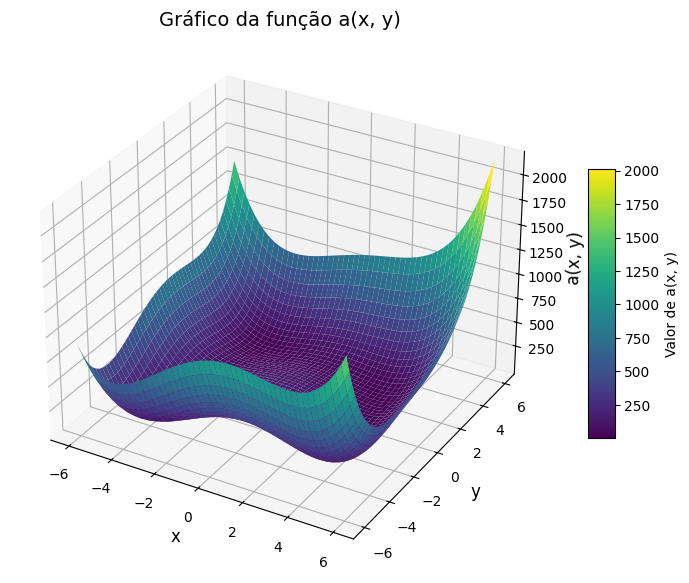

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definindo a função
def a(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Gerando a grade para plotagem
x = np.linspace(-6, 6, 400)  # Valores de x
y = np.linspace(-6, 6, 400)  # Valores de y
X, Y = np.meshgrid(x, y)
Z = a(X, Y)

# Criando o gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotando a superfície
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Configurações do gráfico
ax.set_title('Gráfico da função a(x, y)', fontsize=14)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('a(x, y)', fontsize=12)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Valor de a(x, y)')

# Exibindo o gráfico
plt.show()


#Busca de Armijo

In [4]:
def armijo(x, gama, d, mi):
  k = 1
  d = np.array(d) #direção de descida
  t= 1.0
  while f(x+t*d) > f(x) + mi*t*(np.transpose(gradiente(x)))@d:
    t = gama*t
    k = k+1
  return t, k




#Método Gradiente

In [16]:
def metodo_gradiente_(x, gama, mi, epsilon, maxiter):
  x=np.array(x)
  k=0
  i = 0   #Número de iterações
  t= 0.5
  #while gradiente(x) != 0 :   #provavel ajuste aqui para limitar
  while np.linalg.norm(gradiente(x)) > epsilon and i < maxiter :
    d = -gradiente(x)
    t, kn = armijo(x, gama, d, mi)
    x = x + t*d
    k = k + kn
    i = i+1
  return x, k, i




In [25]:
def metodo_gradiente(x, gama, mi, epsilon, maxiter):
    x = np.array(x)
    k = 0  # Contador de iterações da busca de linha
    i = 0  # Número de iterações do método do gradiente
    t = 0.5  # Tamanho de passo inicial
    beta = 1e-8  # Termo de regularização para evitar problemas numéricos

    while np.linalg.norm(gradiente(x)) > epsilon and i < maxiter:
        grad = gradiente(x)

        # Regularização do gradiente
        grad_norm = np.linalg.norm(grad)
        if grad_norm < beta:
            print(f"Gradiente pequeno demais na iteração {i}, adicionando perturbação.")
            grad += beta * np.random.rand(*grad.shape)

        # Direção de descida
        d = -grad / (grad_norm + beta)  # Evita divisões por zero

        # Busca de linha usando Armijo
        try:
            t, kn = armijo(x, gama, d, mi)
        except Exception as e:
            print(f"Erro na busca de linha: {e}. Usando passo fixo.")
            t = 0.1  # Fallback para um passo fixo

        # Atualização do ponto
        x = x + t * d
        k += kn
        i += 1

        # Logging para depuração
        #print(f"Iteração {i}: x = {x}, grad_norm = {grad_norm}, passo t = {t}")

    return x, k, i


##Método Newton


In [18]:
def newton(x, gama, mi, epsilon):
    k = 0
    i = 0  # Número de iterações
    cont_zero_step = 0  # Contador de passos muito próximos de zero

    while np.linalg.norm(gradiente(x)) > epsilon and i < 100000:
        d = -(np.linalg.inv(hessiana(x))) @ gradiente(x)
        t, kn = armijo(x, gama, d, mi)

        # Verificar se o passo é muito pequeno
        step_size = np.linalg.norm(t * d)
        if step_size < 1e-8:  # Define o limite para considerar próximo de zero
            cont_zero_step += 1
        else:
            cont_zero_step = 0  # Resetar o contador se o passo não for próximo de zero

        # Parar se houver 1000 passos consecutivos próximos de zero
        if cont_zero_step >= 10000:
            print("Parada: 10000 passos consecutivos próximos de zero.")
            break

        # Atualizar x, contadores e incrementar iterações
        x = x + t * d
        k = k + kn
        i = i + 1

    return x, k, i



In [49]:
import numpy as np

def newton__(x, gama, mi, epsilon, maxiter, lambda_=1e-6):
    x = np.array(x, dtype=float)  # Certifique-se de que x seja um array NumPy
    k = 0  # Contador de iterações da busca de linha
    i = 0  # Número de iterações do método de Newton
    t = 0.5  # Tamanho de passo inicial

    while np.linalg.norm(gradiente(x)) > epsilon and i < maxiter:
        grad = gradiente(x)
        hess = hessiana(x)

        # Regularização da Hessiana
        hess_reg = hess + lambda_ * np.eye(len(hess))

        try:
            # Direção de Newton
            d = -np.linalg.inv(hess_reg) @ grad
        except np.linalg.LinAlgError:
            # Fallback para descida gradiente
            print(f"Hessiana singular na iteração {i}, usando descida gradiente.")
            d = -grad

        # Busca de linha robusta
        try:
            t, kn = armijo(x, gama, d, mi)
            if t < 1e-6:  # Fallback para passo fixo
                print(f"Tamanho de passo muito pequeno ({t}), ajustando para passo fixo.")
                t = 0.1
        except Exception as e:
            print(f"Erro na busca de linha: {e}. Usando passo fixo.")
            t = 0.1  # Fallback para um passo fixo

        # Atualização do ponto
        x = x + t * d
        k += kn
        i += 1

        # Logging para depuração
        print(f"Iteração {i}: x = {x}, grad_norm = {np.linalg.norm(grad)}, passo t = {t}")

    return x, k, i


##Método Quase-Newton

In [9]:
def DFS(x0, x1,H): #para funções mais simples converge mais rápido
  x0 = np.array(x0) #x antigo
  x1 = np.array(x1) #x atual
  p = x1-x0
  q = gradiente(x1)-gradiente(x0)
  if np.linalg.norm(p) != 0 and np.linalg.norm(q) != 0:
    H = H + (p@np.transpose(p))/(np.transpose(p)@q) - (H@q@np.transpose(q)@H)/(np.transpose(q)@H@q)
  else:
    H = H
  return H

def BFGS__(x0, x1,H):
  x0 = np.array(x0) #x antigo
  x1 = np.array(x1) #x atual
  p = x1-x0
  q = gradiente(x1)-gradiente(x0)
  H = H + ((1 + np.transpose(q)@H@q)/(np.transpose(p)@q))@((p@np.transpose(p))/(np.transpose(p)@q)) - (((p@np.tranpose(q)@H)+(H@q@np.transpose(p)))/(np.transpose(p)@q))
  return H

def BFGS(x0, x1, H):
    x0 = np.array(x0)  # x antigo
    x1 = np.array(x1)  # x atual
    p = x1 - x0
    q = gradiente(x1) - gradiente(x0)
    # Ensure p and q are column vectors for matrix operations:
    p = p.reshape(-1, 1)  # Reshape p into a column vector
    q = q.reshape(-1, 1)  # Reshape q into a column vector
    # Calculate terms to avoid repeated calculations and for clarity:
    pTp = p.T @ p #transpose(p) @ p
    p_T_q = p.T @ q #transpose(p) @ q
    H_q = H @ q # H@q
    q_T_H_q = q.T @ H_q #transpose(q) @ H @ q
    # update H:
    if p_T_q != 0: #check to avoid division by zero if p.T @ q = 0
        H = H + (1 + q_T_H_q / p_T_q) * (np.outer(p,p.T) / p_T_q) - ((np.outer(p, (q.T @ H)) + np.outer((H_q), p.T)) / p_T_q) #outer to give matrix products as intended
    return H

def quase_newton(x, gama, mi, epsilon,t, maxiter):
  #t é o tamnho de H segundo nossas análises
  k=0
  i = 0 #Número de iterações
  H = np.identity(t) #mudar de acordo com a quantidade de variáveis
  t = 0.5
  while np.linalg.norm(gradiente(x))> epsilon and i < maxiter:
    d = -H@gradiente(x)
    t, kn = armijo(x, gama, d, mi)
    H = BFGS(x, x+t*d, H)
    x = x + t*d
    k = k + kn
    i = i+1
  return x, k,i




In [11]:
gradiente = grad_2
hessiana = hess_2

#t= 0.5
def f(x) :
  return func2(x)

#x = np.random.rand(1)
x = np.array([-0.7])
print(x)
print(metodo_gradiente(x, 0.8, 0.25, 0.0001,10000))
p#rint(newton(x, 0.8,0.25,0.0001, 10000))
#print(quase_newton(x, 0.8, 0.25,0.0001,1,10000))



[-0.7]
Iteração 1: x = [-1.2], grad_norm = 26.028, passo t = 0.5
Iteração 2: x = [-1.7], grad_norm = 36.487999997172274, passo t = 0.5
Iteração 3: x = [-2.2], grad_norm = 39.74800000088207, passo t = 0.5
Iteração 4: x = [-2.7], grad_norm = 32.808000011864436, passo t = 0.5
Iteração 5: x = [-2.956], grad_norm = 12.668000033694469, passo t = 0.25600000000000006
Iteração 6: x = [-2.88889114], grad_norm = 3.725355205030226, passo t = 0.06710886400000003
Iteração 7: x = [-2.90648332], grad_norm = 1.0053338746976408, passo t = 0.017592186044416015
Iteração 8: x = [-2.90279397], grad_norm = 0.20429435414696684, passo t = 0.003689348814741915
Iteração 9: x = [-2.90376111], grad_norm = 0.05116766210620938, passo t = 0.0009671406556917048
Iteração 10: x = [-2.9034442], grad_norm = 0.015708405597493424, passo t = 0.0003169126500570579
Iteração 11: x = [-2.90357401], grad_norm = 0.006212713916298185, passo t = 0.00012980742146337094
Iteração 12: x = [-2.90352084], grad_norm = 0.0027653216440910455

<function __main__.p()>

In [22]:
gradiente = gradiente_2
hessiana = hessiana_2


x = np.random.rand(100)
x = np.array(100*[-0.7])
print(x)
print(metodo_gradiente(x, 0.4 ,0.1, 0.0001,10))
#print(newton(x, 0.8, 0.25,0.0001, 10000))
#print(quase_newton(x, 0.8, 0.25,0.000001,100, 10000))

[-0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7
 -0.7 -0.7]
Iteração 1: x = [-0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.7 -0.

In [54]:
gradiente = grad_1
hessiana = hess_1
def f(x) :
  return func1(x)
x  = [3,-1]
print(x)
print(metodo_gradiente(x, 0.8, 0.25, 0.0001,10000))
print(newton(x, 0.8, 0.25,0.0001))
print(quase_newton(x, 0.8, 0.25,0.0001,2,10000))

[3, -1]
(array([0.99992803, 0.99985593]), 495351, 9658)
(array([1.00000323, 1.00000644]), 42, 19)
(array([0.99999994, 0.99999989]), 95, 29)


In [24]:
gradiente = gradiente_1
hessiana = hesssiana_1
def f(x):
  return funcao_1(x)
x = np.random.rand(7)
x =  [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
print(x)

print(metodo_gradiente(x, 0.4, 0.01, 0.0001,60000))
#print(newton(x, 0.5, 0.25,0.0001,20000))
#print(quase_newton(x, 0.8, 0.25,0.0001,7,10000))

A saída de streaming foi truncada nas últimas 5000 linhas.
Iteração 57502: x = [0.90244979 0.89866238 0.89866238 0.89866238 0.89866238 0.89866238
 0.89864735], grad_norm = 53.32235851153867, passo t = 1.2089258196146318e-16
Iteração 57503: x = [0.90244979 0.89866238 0.89866238 0.89866238 0.89866238 0.89866238
 0.89864735], grad_norm = 53.32235851153861, passo t = 1.2089258196146318e-16
Iteração 57504: x = [0.90244979 0.89866238 0.89866238 0.89866238 0.89866238 0.89866238
 0.89864735], grad_norm = 53.32235851153858, passo t = 1.2089258196146318e-16
Iteração 57505: x = [0.90244979 0.89866238 0.89866238 0.89866238 0.89866238 0.89866238
 0.89864735], grad_norm = 53.32235851153853, passo t = 1.2089258196146318e-16
Iteração 57506: x = [0.90244979 0.89866238 0.89866238 0.89866238 0.89866238 0.89866238
 0.89864735], grad_norm = 53.322358511538475, passo t = 1.2089258196146318e-16
Iteração 57507: x = [0.90244979 0.89866238 0.89866238 0.89866238 0.89866238 0.89866238
 0.89864735], grad_norm = 53

In [27]:
gradiente = grad_3
hessiana = hess_3
def f(x) :
  return func3(x)
x  = [-2.8,3]
print(x)
print(metodo_gradiente(x, 0.8, 0.25, 0.0001,10000))
print(newton(x, 0.8, 0.25,0.0001,10000))
print(quase_newton(x, 0.8, 0.25,0.0001,2,10000))

[-2.8, 3]
Iteração 1: x = [-2.8032466   3.16774074], grad_norm = 9.921857890536428, passo t = 0.1677721600000001
Iteração 2: x = [-2.80577664  3.12383311], grad_norm = 2.988047735081643, passo t = 0.043980465111040035
Iteração 3: x = [-2.80497448  3.13302154], grad_norm = 0.6026724286285609, passo t = 0.009223372036854787
Iteração 4: x = [-2.8051767   3.13061216], grad_norm = 0.1382575219894979, passo t = 0.002417851639229262
Iteração 5: x = [-2.80509411  3.13159906], grad_norm = 0.05659287993693879, passo t = 0.0009903520314283058
Iteração 6: x = [-2.80512793  3.13119482], grad_norm = 0.02316452855959627, passo t = 0.00040564819207303417
Iteração 7: x = [-2.80511408  3.1313604 ], grad_norm = 0.009513039781226773, passo t = 0.00016615349947311482
Iteração 8: x = [-2.80511975  3.13129258], grad_norm = 0.003870183559946287, passo t = 6.805647338418785e-05
Iteração 9: x = [-2.80511743  3.13132036], grad_norm = 0.001611828029868252, passo t = 2.7875931498163346e-05
Iteração 10: x = [-2.805

In [28]:
gradiente = grad_3
hessiana = hess_3
def f(x) :
  return func3(x)
x  = [2.8,2]
print(x)
print(metodo_gradiente(x, 0.8, 0.25, 0.0001,10000))
print(newton(x, 0.8, 0.25,0.0001,10000))
print(quase_newton(x, 0.8, 0.25,0.0001,2,10000))

[2.8, 2]
Iteração 1: x = [3.05158743 2.07364268], grad_norm = 13.953926472502285, passo t = 0.2621440000000001
Iteração 2: x = [2.96285197 2.01318414], grad_norm = 6.5496528157137455, passo t = 0.10737418240000006
Iteração 3: x = [3.006525   2.01837525], grad_norm = 2.45456652639271, passo t = 0.043980465111040035
Iteração 4: x = [2.99310542 2.00635721], grad_norm = 1.14512299409313, passo t = 0.018014398509482003
Iteração 5: x = [3.00033023 2.00485815], grad_norm = 0.3895635633903621, passo t = 0.00737869762948383
Iteração 6: x = [2.99760699 2.00100008], grad_norm = 0.21096667438929373, passo t = 0.004722366482869652
Iteração 7: x = [3.00061763 2.00126551], grad_norm = 0.157490897890446, passo t = 0.0030223145490365774
Iteração 8: x = [2.99939761 2.00031363], grad_norm = 0.09009770308827783, passo t = 0.0015474250491067279
Iteração 9: x = [3.00003102 2.00033649], grad_norm = 0.03831674587351598, passo t = 0.0006338253001141158
Iteração 10: x = [2.99983662 2.00007665], grad_norm = 0.01

In [30]:
gradiente = grad_3
hessiana = hess_3
def f(x) :
  return func3(x)
x  = [3.6,-1.8]
print(x)
print(metodo_gradiente(x, 0.8, 0.25, 0.0001,10000))
print(newton(x, 0.8, 0.25,0.0001,10000))
print(quase_newton(x, 0.8, 0.25,0.0001,2,10000))

[3.6, -1.8]
Iteração 1: x = [ 3.5717435 -1.8209645], grad_norm = 2.4704331603992062, passo t = 0.03518437208883203
Iteração 2: x = [ 3.59097    -1.83268635], grad_norm = 1.3275795037845186, passo t = 0.022517998136852502
Iteração 3: x = [ 3.57872343 -1.84028327], grad_norm = 0.9360411924196238, passo t = 0.014411518807585602
Iteração 4: x = [ 3.58743293 -1.84331893], grad_norm = 0.5739501109570844, passo t = 0.009223372036854787
Iteração 5: x = [ 3.58207601 -1.8457985 ], grad_norm = 0.3842630698824137, passo t = 0.005902958103587064
Iteração 6: x = [ 3.58502453 -1.84646229], grad_norm = 0.23585261985337197, passo t = 0.0030223145490365774
Iteração 7: x = [ 3.58376526 -1.84736161], grad_norm = 0.09100065200590148, passo t = 0.0015474250491067279
Iteração 8: x = [ 3.58471951 -1.84762656], grad_norm = 0.06657701246911917, passo t = 0.0009903520314283058
Iteração 9: x = [ 3.58426431 -1.84784994], grad_norm = 0.03785951744531472, passo t = 0.0005070602400912927
Iteração 10: x = [ 3.58450048

In [39]:
gradiente = grad_3
hessiana = hess_3
def f(x) :
  return func3(x)
x  = [-1,1]
print(x)
print(metodo_gradiente(x, 0.8, 0.25, 0.0001,10000))
print(newton(x, 0.8, 0.25,0.0001))
print(quase_newton(x, 0.8, 0.25,0.0001,2,10000))
x  = [1,-1]
print(x)
print(metodo_gradiente(x, 0.8, 0.25, 0.0001,10000))
print(newton(x, 0.8, 0.25,0.0001))
print(quase_newton(x, 0.8, 0.25,0.0001,2,10000))
x  = [1,1]
print(x)
print(metodo_gradiente(x, 0.8, 0.25, 0.0001,10000))
print(newton(x, 0.8, 0.25,0.0001))
print(quase_newton(x, 0.8, 0.25,0.0001,2,10000))
x  = [-1,-1]
print(x)
print(metodo_gradiente(x, 0.8, 0.25, 0.0001,10000))
print(newton(x, 0.8, 0.25,0.0001))
print(quase_newton(x, 0.8, 0.25,0.0001,2,10000))


[-1, 1]
(array([-2.80511802,  3.13131327]), 411, 15)
Parada: 10000 passos consecutivos próximos de zero.
(array([-1.,  1.]), 1729817, 9999)
(array([-2.80511812,  3.13131256]), 42, 9)
[1, -1]
(array([ 3.58442756, -1.84812536]), 747, 28)
Parada: 10000 passos consecutivos próximos de zero.
(array([ 1., -1.]), 1709819, 9999)
(array([ 3.5844284 , -1.84812534]), 36, 7)
[1, 1]
(array([3.00000025, 2.00000103]), 626, 21)
Parada: 10000 passos consecutivos próximos de zero.
(array([ 0.56790283, -2.42215134]), 1679805, 10001)
(array([2.99999997, 2.00000003]), 42, 10)
[-1, -1]
(array([-3.77930983, -3.2831862 ]), 396, 16)
Parada: 10000 passos consecutivos próximos de zero.
(array([-1., -1.]), 1689814, 9999)
(array([-3.77931064, -3.28318645]), 42, 10)


In [29]:
gradiente = grad_1
hessiana = hess_1
def f(x) :
  return func1(x)
x  = [6.0524426 ,6.3062515]
print(x)
print(metodo_gradiente(x, 0.4, 0.1, 0.0001,20000))
print(newton(x, 0.8, 0.25,0.0001))
print(quase_newton(x, 0.8, 0.25,0.0001,2,10000))
x = [6.0772553 ,3.6654355]
print(x)
print(metodo_gradiente(x, 0.4, 0.1, 0.0001,20000))
print(newton(x, 0.8, 0.25,0.0001))
print(quase_newton(x, 0.8, 0.25,0.0001,2,10000))
x = [6.4992851, 9.8216652]
print(x)
print(metodo_gradiente(x, 0.4, 0.1, 0.0001,40000))
print(newton(x, 0.8, 0.25,0.0001))
print(quase_newton(x, 0.8, 0.25,0.0001,2,10000))

[6.0524426, 6.3062515]
(array([1.00007597, 1.00015233]), 165437, 17314)
(array([1., 1.]), 82, 33)
(array([1.00000003, 1.00000007]), 95, 29)
[6.0772553, 3.6654355]
(array([1.000076  , 1.00015241]), 185805, 17106)
(array([1., 1.]), 80, 33)
(array([1., 1.]), 93, 26)
[6.4992851, 9.8216652]
(array([1.00007604, 1.0001523 ]), 398685, 39192)
(array([1., 1.]), 86, 35)
(array([0.99999997, 0.99999993]), 83, 19)


In [50]:
gradiente = grad_3
hessiana = hess_3
def f(x) :
  return func3(x)
x  = [0,0]
print(x)
print(metodo_gradiente(x, 0.8, 0.25, 0.0001,10000))
print(newton(x, 0.8, 0.25,0.0001))
print(quase_newton(x, 0.8, 0.25,0.0001,2,10000))

[0, 0]
Iteração 1: x = [0.53687549 0.84366149], grad_norm = 26.076809620810597, passo t = 1.0
Iteração 2: x = [1.17791171 1.61117211], grad_norm = 51.00256356395231, passo t = 1.0
Iteração 3: x = [1.9461216  2.25137018], grad_norm = 57.47383700936562, passo t = 1.0
Iteração 4: x = [2.915422  2.4972497], grad_norm = 39.8133859501007, passo t = 1.0
Iteração 5: x = [2.8156799  1.99505899], grad_norm = 21.906685045014285, passo t = 0.5120000000000001
Iteração 6: x = [3.01645704 2.05563131], grad_norm = 13.09490880542903, passo t = 0.2097152000000001
Iteração 7: x = [2.97716527 2.01718041], grad_norm = 3.288126309039477, passo t = 0.054975581388800036
Iteração 8: x = [3.00517062 2.01435509], grad_norm = 1.335159810303458, passo t = 0.028147497671065627
Iteração 9: x = [2.99439926 2.00478066], grad_norm = 0.8982980897301663, passo t = 0.014411518807585602
Iteração 10: x = [3.00022754 2.00384468], grad_norm = 0.3218458840520271, passo t = 0.005902958103587064
Iteração 11: x = [2.99850882 2.00

##Método Gradiente
\begin{array}{|c|c|c|}
\hline
\textbf{Ponto Inicial} & \textbf{Iterações} & \textbf{Chamadas Armijo} & \textbf{Ponto Ótimo} & \textbf{Valor Ótimo} & \textbf{Erro de Aproximação} \\
\hline
 [-2.8,3] & 11 & 382 & [-2.80511799, 3.13131364] & 5.105747476392541e-11 & \\
\hline
[2.8, 2]  & 17 & 569 & [3.0000001 , 2.00000177] & 5.7169345019539206e-11\\
\hline
[3.6, -1.8]  & 19 & 714 & [ 3.58442756, -1.84812568] &3.7830407320702e-11 \\
\hline
[-3.3, -3.8] & 14 & 440 & [-3.77930997, -3.28318615] & 7.050117631524029e-12  & \\
\hline
[0, 0] & 22 & 598 & [3.00000041, 2.0000013 ] & 7.050117631524029e-12  & \\
\hline
[-1, 1] & 15 & 411 & [-2.80511802,  3.13131327] &  2.294093361702223e-11  & \\
\hline
[1, -1] & 28 & 747 & [ 3.58442756, -1.84812536] &  4.554535767580354e-11  & \\
\hline
[1, 1] & 21 & 626 & [3.00000025, 2.00000103] & 2.5497809574827645e-11 & \\
\hline
[-1, -1] & 16 & 396 & [-3.77930983, -3.2831862 ]& 1.4838334274336426e-11  & \\
\hline
\end{array}



##Método Newton
\begin{array}{|c|c|c|}
\hline
\textbf{Ponto Inicial} & \textbf{Iterações} & \textbf{Chamadas Armijo} & \textbf{Ponto Ótimo} & \textbf{Valor Ótimo} & \textbf{Erro de Aproximação} \\
\hline
[-2.8,3] & 11 & 382 & [-2.80511809, 3.13131252] & 4.1769172082493904e-16& \\
\hline
[2.8, 2] & 3 & 3 & [3.00000007, 1.99999997]& 1.5460000288148232e-13&\\
\hline
[3.6, -1.8] & 2 & 2 & [ 3.58442859, -1.8481291 ] & 9.587619573598209e-11  & \\
\hline
[-3.3, -3.8] & 4 & 4 & [-3.77931026, -3.28318599] &  2.862961866226404e-15   & \\
\hline
[0,0] & 9999 & 3208355, & [-3.49888468e-16, -8.88178420e-16]& 170.00000000000006 \\
\hline
[-1, 1] & 9999 & 1729817, & [-1.,  1.]& 130\\
\hline
[1, -1] & 9999 & 1709819, & [1., -1.]&  146\\
\hline
[1, 1] & 10001 & 1679805, & [1, 1]& 106\\
\hline
[-1, -1] & 9999 & 1689814, &[-1, -1]& 170\\
\hline
\end{array}

Nos pontos [-1,1], [1,-1], [1,1], [-1,-1] o algoritmo parou antes pois os passos não estavam diminuindo consideravelmente.


##Método Quase-Newton
\begin{array}{|c|c|c|}
\hline
\textbf{Ponto Inicial} & \textbf{Iterações} & \textbf{Chamadas Armijo} & \textbf{Ponto Ótimo} & \textbf{Valor Ótimo} & \textbf{Erro de Aproximação} \\
\hline
[-2.8,3] & 11 & 382 & [-2.80511809, 3.13131252] & 4.1769172082493904e-16  & \\
\hline
 [2.8,3] & 6& 37& [2.99999985, 2.00000055] & 4.325001228272068e-12\\
\hline
[3.6, -1.8] & 4 & 38 & [ 3.58442877, -1.84812544]& 3.023950879329981e-11& \\
\hline
[-3.3, -3.8] & 6 & 44 & [-3.7793102 , -3.28318606] & 4.775494209944007e-13 & \\
\hline
[0, 0] & 10 & 39 & [2.99999951, 2.00000104] & 1.707890702504046e-11 & \\
\hline
[-1, 1] & 9 & 42 & [-2.80511812,  3.13131256]& 1.0377102584115232e-13 \\
\hline
[1, -1] & 7 & 36 & [ 3.5844284 , -1.84812534]& 2.1335895395100638e-11 \\
\hline
[1, 1] & 10 & 42 & [2.99999997, 2.00000003]& 3.059999952147737e-14\\
\hline
[-1, -1] & 42 & 10 &[-3.77931064, -3.28318645]& 1.2962468873759456e-11\\
\hline
\end{array}



In [42]:
print(func3([-2.80511812,  3.13131256]))
print(func3([ 3.5844284 , -1.84812534] ))
print(func3([2.99999997, 2.00000003]))
print(func3([-3.77931064, -3.28318645]))




1.0377102584115232e-13
2.1335895395100638e-11
3.059999952147737e-14
1.2962468873759456e-11
